<span style="font-size:22px; font-weight:700">Model Import</span>

In [25]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n = pypsa.Network()
n.import_from_netcdf(path="../FYP-TZ-APG-Hydrogen-Integration/TZ-APG v1/tz-apg-v1_scenario-bau.nc")

INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


In [27]:
# User inputs
start_year = 2023
start_week = 1
period_length_weeks = 52  # how many weeks to include

# Get all snapshots for the chosen year
year_snapshots = [s for s in n.snapshots if s[0] == start_year]

# Filter snapshots within the chosen period
selected_snapshots = []
for s in year_snapshots:
    timestamp = pd.to_datetime(s[1])
    week_number = timestamp.isocalendar()[1]
    if start_week <= week_number < start_week + period_length_weeks:
        selected_snapshots.append(s)

print(selected_snapshots)

# Set the filtered snapshots
n.set_snapshots(pd.MultiIndex.from_tuples(selected_snapshots, names=['period', 'snapshot']))

n.optimize(n.snapshots[::6]);  
# n.statistics.supply(comps=["Generator"]).droplevel(0).div(1e3).plot.bar(
#     title="Generator in GWh"
# )

[(2023, Timestamp('2023-01-01 00:00:00')), (2023, Timestamp('2023-01-01 02:00:00')), (2023, Timestamp('2023-01-01 04:00:00')), (2023, Timestamp('2023-01-01 06:00:00')), (2023, Timestamp('2023-01-01 08:00:00')), (2023, Timestamp('2023-01-01 10:00:00')), (2023, Timestamp('2023-01-01 12:00:00')), (2023, Timestamp('2023-01-01 14:00:00')), (2023, Timestamp('2023-01-01 16:00:00')), (2023, Timestamp('2023-01-01 18:00:00')), (2023, Timestamp('2023-01-01 20:00:00')), (2023, Timestamp('2023-01-01 22:00:00')), (2023, Timestamp('2023-01-02 00:00:00')), (2023, Timestamp('2023-01-02 02:00:00')), (2023, Timestamp('2023-01-02 04:00:00')), (2023, Timestamp('2023-01-02 06:00:00')), (2023, Timestamp('2023-01-02 08:00:00')), (2023, Timestamp('2023-01-02 10:00:00')), (2023, Timestamp('2023-01-02 12:00:00')), (2023, Timestamp('2023-01-02 14:00:00')), (2023, Timestamp('2023-01-02 16:00:00')), (2023, Timestamp('2023-01-02 18:00:00')), (2023, Timestamp('2023-01-02 20:00:00')), (2023, Timestamp('2023-01-02 22:0

INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 7/7 [00:00<00:00,  7.92it/s]
INFO:linopy.io: Writing time: 9.52s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 563846 primals, 1874099 duals
Objective: 1.60e+09
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


In [4]:
# # Get generator supply time series (entire timeframe)
# df = n.statistics.supply(comps=["Generator"], aggregate_time=False).droplevel(0).div(1e3)

# # Extract timestamps from MultiIndex columns if necessary
# if isinstance(df.columns[0], tuple):
#     timestamps = [col[1] for col in df.columns]  # second element is the timestamp
# else:
#     timestamps = df.columns

# # Plot
# fig, ax = plt.subplots(figsize=(12, 6))
# df.T.plot.area(title="Generation in GW", ax=ax, legend=False, linewidth=0)

# # Format x-axis labels
# num_snapshots = len(timestamps)
# step = max(1, num_snapshots // 10)  # show ~10 evenly spaced ticks

# def format_timestamp(ts):
#     try:
#         return ts.strftime("%Y/%m/%d, %#I%p").lower()  # works on Windows
#     except ValueError:
#         return ts.strftime("%Y/%m/%d, %-I%p").lower()  # fallback for Unix

# ax.set_xticks(range(0, num_snapshots, step))
# ax.set_xticklabels(
#     [format_timestamp(ts) for ts in timestamps[::step]],
#     rotation=45, ha='right'
# )

# # Legend
# ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
# plt.tight_layout()
# plt.show()


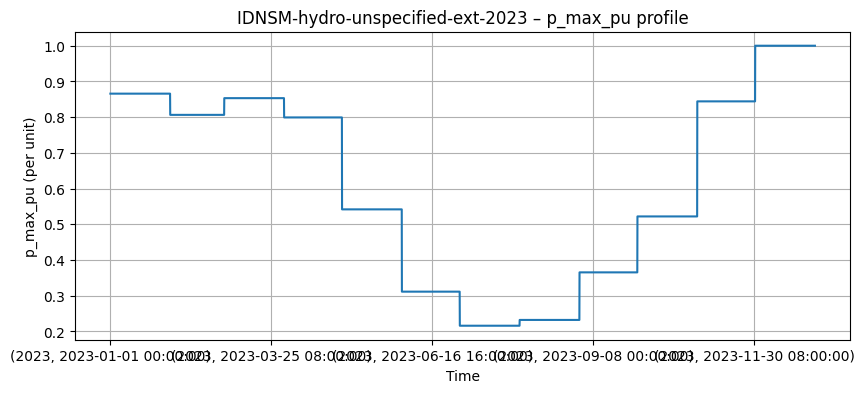

In [18]:
n.generators_t.p_max_pu.head()
gen_name = "IDNSM-hydro-unspecified-ext-2023"
n.generators_t.p_max_pu[gen_name].plot(figsize=(10,4))
plt.title(f"{gen_name} – p_max_pu profile")
plt.xlabel("Time")
plt.ylabel("p_max_pu (per unit)")
plt.grid(True)
plt.show()

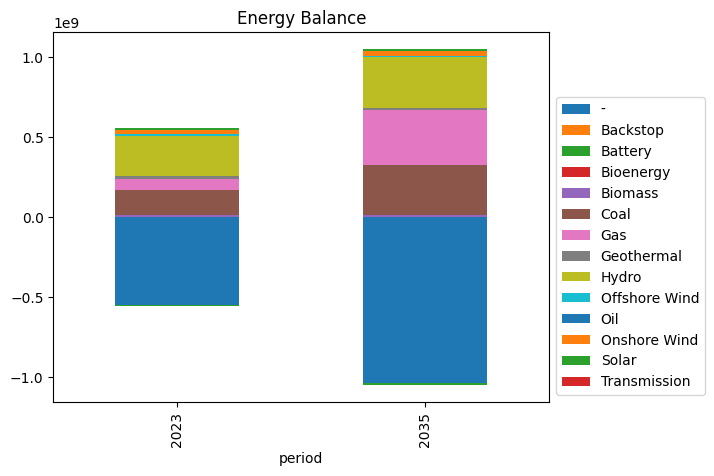

In [6]:
fig, ax = plt.subplots()

# Group by carrier and sum across components/bus_carrier
n.statistics.energy_balance().groupby("carrier").sum().T.plot(
    kind="bar", stacked=True, ax=ax, title="Energy Balance"
)

# Adjust legend
ax.legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.show()